<a href="https://colab.research.google.com/github/Andi-IM/Airline-Ticket-Predictive-Analysis/blob/main/Airline_Price_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Price Predictive Analytics

## About

Proyek ini akan menganalisa dataset penerbangan dari platform [Kaggle](kaggle.com) dan membuat model prediksi harga tiket pesawat.

# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import seaborn as sns

In [4]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andiirhamm","key":"464e90c162d7c838e2ad7b91f19165eb"}'}

In [5]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Mar  1 07:05 kaggle.json


In [6]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
%mkdir -p ~/.kaggle
%cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 163MB/s]


In [8]:
!unzip flight-price-prediction.zip -d .

Archive:  flight-price-prediction.zip
  inflating: ./Clean_Dataset.csv     
  inflating: ./business.csv          
  inflating: ./economy.csv           


# Data Loading

In [9]:
airlines = pd.read_csv('Clean_Dataset.csv')
airlines

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Output kode di atas memberikan informasi sebagai berikut:
- Terdapat 300.153 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 12 kolom yaitu: Unnamed: 0, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price.

# Explanatory Data Analysis

## Informasi dataset

In [10]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Dari output terlihat bahwa:
- Terdapat 8 kolom dengan tipe object, yaitu: airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 1 kolom dengan tipe data float64 yaitu duration.
- Terdapat 3 kolom dengan tipe data int64 yaitu unnamed: 0, days_left, dan price. Kolom price adalah fitur targetnya.

In [11]:
airlines.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## Null Check

In [12]:
airlines.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Dari informasi di atas tidak terdapat nilai yang null.

## Outlier Check

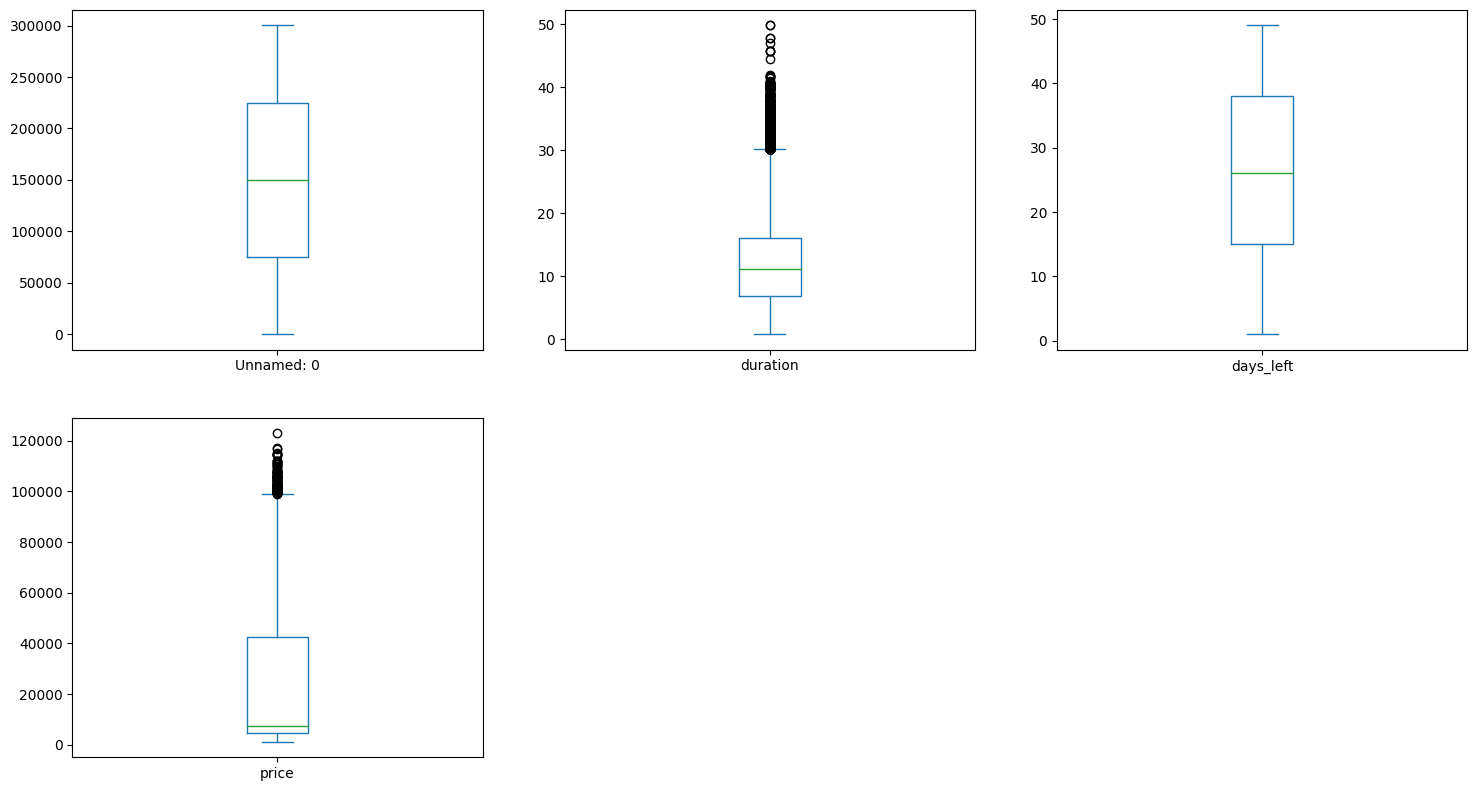

In [13]:
airlines.plot(kind='box', subplots=True, layout=(3,3), figsize=(18,15))
plt.show()

Terdapat outlier pada durasi, sehingga kita perlu menghapus sebagian dari outlier tersebut.

In [14]:
Q1 = airlines.quantile(0.25)
Q3 = airlines.quantile(0.75)
IQR=Q3-Q1
airlines=airlines[~((airlines<(Q1-1.5*IQR))|(airlines>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
airlines.shape

<ipython-input-14-75a4a2bb1c09>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = airlines.quantile(0.25)
<ipython-input-14-75a4a2bb1c09>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = airlines.quantile(0.75)
<ipython-input-14-75a4a2bb1c09>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  airlines=airlines[~((airlines<(Q1-1.5*IQR))|(airlines>(Q3+1.5*IQR))).any(axis=1)]


(297920, 12)

Data yang bersih ada 297.920 sampel.

## Univariate Analysis

### Data Kategorikal

#### 1. Fitur airline

In [15]:
count = airlines['airline'].value_counts()
percent = 100*airlines['airline'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

           jumlah sampel  persentase
Vistara           126917        42.6
Air_India          79601        26.7
Indigo             43120        14.5
GO_FIRST           23173         7.8
AirAsia            16098         5.4
SpiceJet            9011         3.0


> Terdapat 6 Maskapai yang berbeda dan Vistara yang menjadi maskapai paling banyak digunakan.

#### 2. Fitur flight

In [16]:
count = airlines['flight'].value_counts()
percent = 100*airlines['flight'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

         jumlah sampel  persentase
UK-706            3116         1.0
UK-772            2711         0.9
UK-720            2630         0.9
UK-836            2532         0.8
UK-874            2422         0.8
...                ...         ...
6E-865               1         0.0
SG-9974              1         0.0
6E-2914              1         0.0
G8-705               1         0.0
SG-9923              1         0.0

[1561 rows x 2 columns]


In [17]:
num_of_flight = len(airlines['flight'].value_counts())
print(f'Num of flight: {num_of_flight}')

Num of flight: 1561


> Terdapat 1561 Penerbangan dan UK-706 menjadi penerbangan yang paling sibuk.

#### 3. Fitur source_city

In [18]:
count = airlines['source_city'].value_counts()
percent = 100*airlines['source_city'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

           jumlah sampel  persentase
Delhi              61156        20.5
Mumbai             60683        20.4
Bangalore          51548        17.3
Kolkata            45841        15.4
Hyderabad          40636        13.6
Chennai            38056        12.8


> Terdapat 6 kota asal dan penerbangan dari Kota Delhi menjadi paling banyak.

#### 4. Fitur destination_city

In [19]:
count = airlines['destination_city'].value_counts()
percent = 100*airlines['destination_city'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

           jumlah sampel  persentase
Mumbai             58656        19.7
Delhi              57141        19.2
Bangalore          50686        17.0
Kolkata            49138        16.5
Hyderabad          42329        14.2
Chennai            39970        13.4


> Terdapat 6 kota tujuan dan penerbangan menuju Kota Mumbai menjadi yang paling banyak.

#### 5. Fitur departure_time

In [20]:
count = airlines['departure_time'].value_counts()
percent = 100*airlines['departure_time'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

               jumlah sampel  persentase
Morning                70372        23.6
Early_Morning          66189        22.2
Evening                64955        21.8
Night                  47998        16.1
Afternoon              47100        15.8
Late_Night              1306         0.4


> Waktu numerik diubah menjadi 6 kategorikal, dengan penerbangan di waktu pagi menjadi yang paling sibuk.

#### 6. Fitur arrival_time

In [21]:
count = airlines['arrival_time'].value_counts()
percent = 100*airlines['arrival_time'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

               jumlah sampel  persentase
Night                  90702        30.4
Evening                77217        25.9
Morning                62708        21.0
Afternoon              37938        12.7
Early_Morning          15367         5.2
Late_Night             13988         4.7


> Waktu numerik diubah menjadi 6 kategorikal, dengan kedatangan di waktu malam menjadi yang paling banyak.

#### 7. Fitur stops

In [22]:
count = airlines['stops'].value_counts()
percent = 100*airlines['stops'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

             jumlah sampel  persentase
one                 249478        83.7
zero                 36004        12.1
two_or_more          12438         4.2


> Jumlah transit penerbangan diubah menjadi 3 kategorikal dan penerbangan sekali menjadi yang paling banyak.

#### 8. Fitur class

In [23]:
count = airlines['class'].value_counts()
percent = 100*airlines['class'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

          jumlah sampel  persentase
Economy          204792        68.7
Business          93128        31.3


> Maskapai dengan kelas Ekonomi menjadi yang paling banyak digunakan dengan 68%.

### Data Numerikal

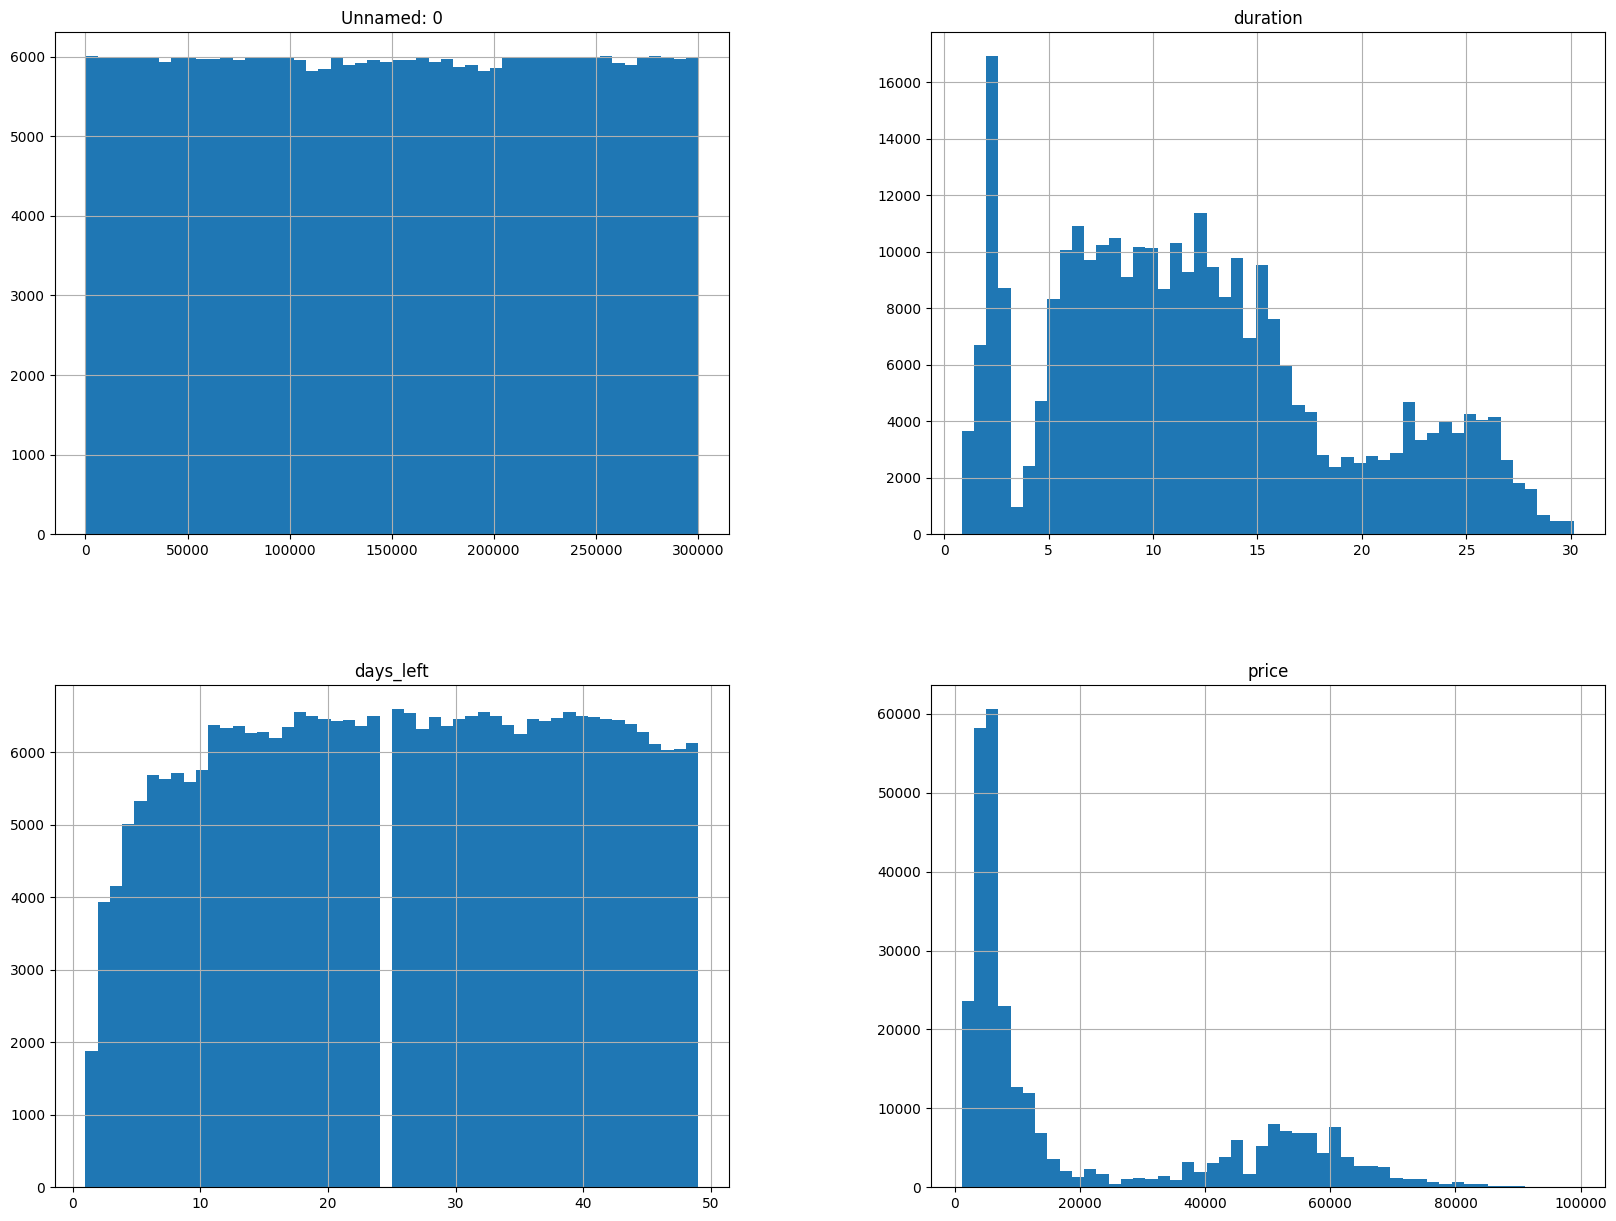

In [24]:
airlines.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "price", dapat diperoleh beberapa informasi antara lain:

- Peningkatan harga tiket pesawat sebanding dengan penurunan jumlah sampel. Hal ini dengan jelas dari histogram "price" yang mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
- Rentang harga tiket cukup tinggi dari skala puluhan ribu dolar hingga sekitar \$90000.
- Setengah harga tiket pesawat bernilai di bawah \$10000.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

## Multivariate Analysis

#### 7 Kota asal dan tujuan berdasarkan harga

In [25]:
source_and_dest = airlines.groupby(['source_city', 'destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending=False)
source_and_dest[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,297361946
14,Delhi,Mumbai,295931282
25,Mumbai,Bangalore,295144035
29,Mumbai,Kolkata,281300867
27,Mumbai,Delhi,277191827
10,Delhi,Bangalore,250343799
24,Kolkata,Mumbai,247431481


#### 5 Penerbangan dan Maskapai berdasarkan harga

In [26]:
airline_and_flight = airlines.groupby(['flight', 'airline'])["price"].count().reset_index().sort_values("price", ascending=False)
airline_and_flight[0:5]

,flight,airline,price
1442,UK-706,Vistara,3116
1454,UK-772,Vistara,2711
1445,UK-720,Vistara,2630
1490,UK-836,Vistara,2532
1518,UK-874,Vistara,2422


<ipython-input-27-44ed62fb9c64>:3: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  ax = sns.barplot(x='flight', y='price', hue='airline', data=airline_and_flight[0:5], palette=colors)


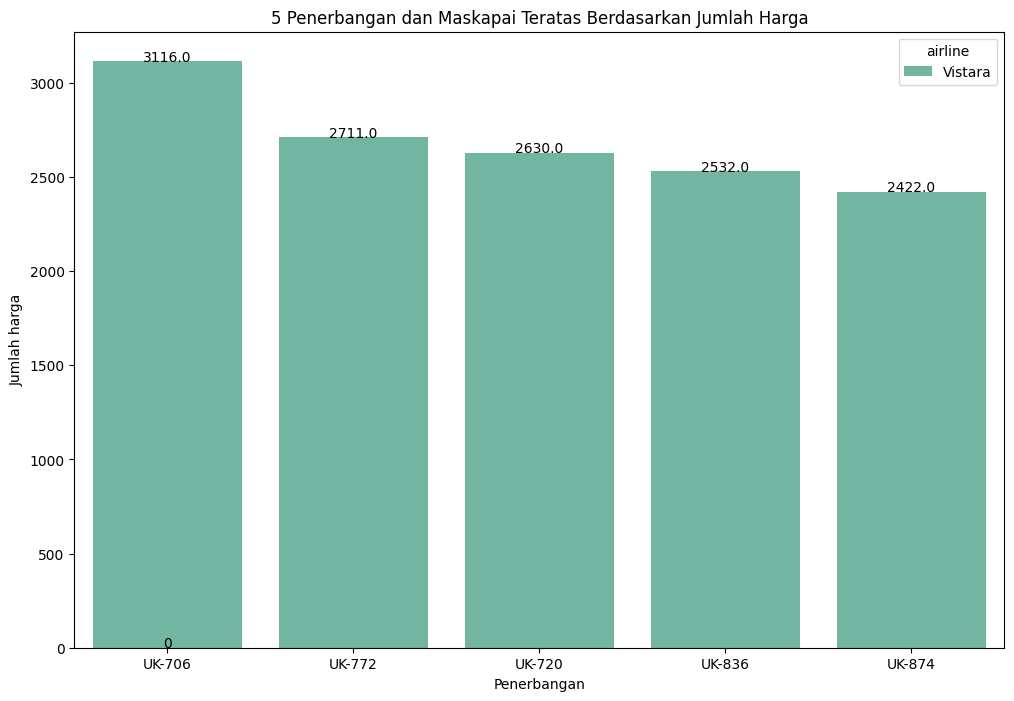

In [27]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(airline_and_flight[0:5]))
ax = sns.barplot(x='flight', y='price', hue='airline', data=airline_and_flight[0:5], palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Penerbangan')
plt.ylabel('Jumlah harga')
plt.title('5 Penerbangan dan Maskapai Teratas Berdasarkan Jumlah Harga')
plt.show()

> ℹ **Informasi**: Penerbangan yang paling sering digunakan adalah UK-706 dan maskapai yang digunakan adalah Vistara airlines.

#### **Analisa Penerbangan Kelas Ekonomi**

In [28]:
eco = airlines[airlines['class']=='Economy']

In [29]:
eco['airline'].value_counts()

Vistara      66616
Air_India    46774
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

Text(0.5, 1.0, 'Distribusi maskapai paling digunakan pada kelas ekonomi')

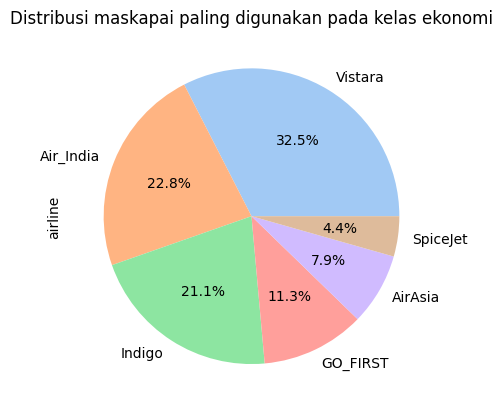

In [30]:
colors = sns.color_palette('pastel')
eco['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribusi maskapai paling digunakan pada kelas ekonomi')

In [31]:
eco_price_per_airline = eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
eco_price_per_airline

,airline,price
5,Vistara,516784859
1,Air_India,338347339
3,Indigo,229580207
2,GO_FIRST,130973972
0,AirAsia,65858089
4,SpiceJet,55681482


<ipython-input-32-9f0acdbd9351>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='airline', y='price', data=eco_price_per_airline, palette=colors)


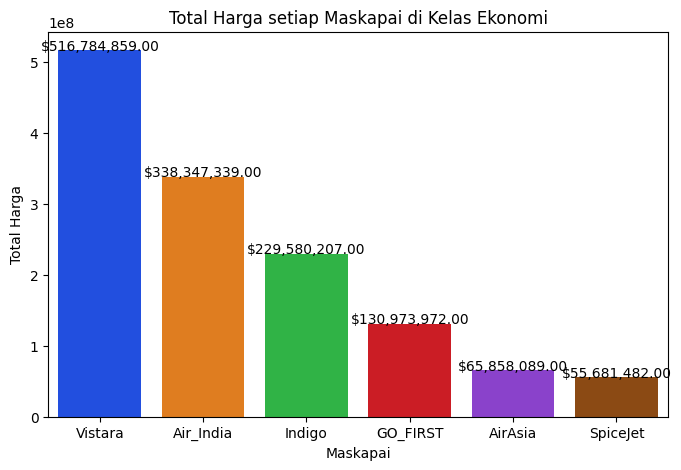

In [32]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette('bright', len(eco_price_per_airline))
ax = sns.barplot(x='airline', y='price', data=eco_price_per_airline, palette=colors)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Maskapai')
plt.ylabel('Total Harga')
plt.title('Total Harga setiap Maskapai di Kelas Ekonomi')

plt.show()

Kota mana saja yang paling banyak menggunakan tiket kelas ekonomi?

Text(0.5, 1.0, 'Distribusi kota asal di kelas ekonomi')

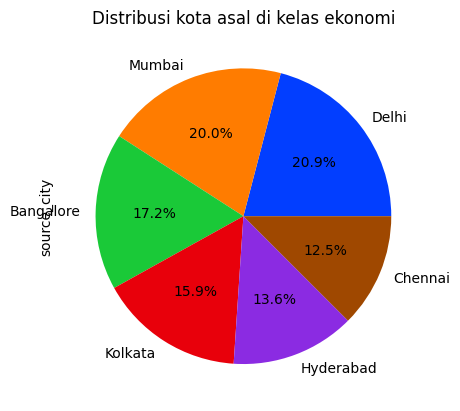

In [33]:
eco['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribusi kota asal di kelas ekonomi')

> 1 - Maskapai yang paling sering digunakan juga mencapai profit tertinggi adalah Vistara dan setelahnya ada Air India.


> 2 - Kota yang paling banyak menggunakan kelas ekonomi adalah Delhi dan setelahnya adalah Mumbai.

**Analisa Penerbangan di Kelas Bisnis**

In [34]:
bus = airlines[airlines['class']=='Business']

Text(0.5, 1.0, 'Maskapai dengan kelas bisnis yang digunakan')

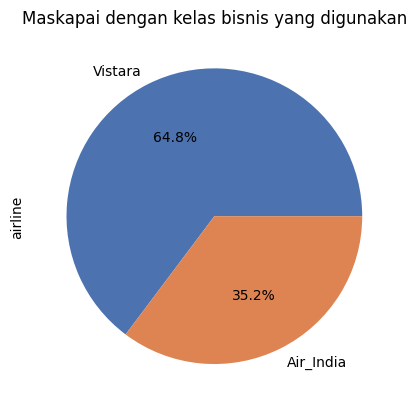

In [35]:
colors = sns.color_palette('deep')
bus['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Maskapai dengan kelas bisnis yang digunakan')

In [36]:
bus_price_per_airline = bus.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
bus_price_per_airline

,airline,price
1,Vistara,3337615087
0,Air_India,1546604830


<ipython-input-37-32a1a8400f8b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)


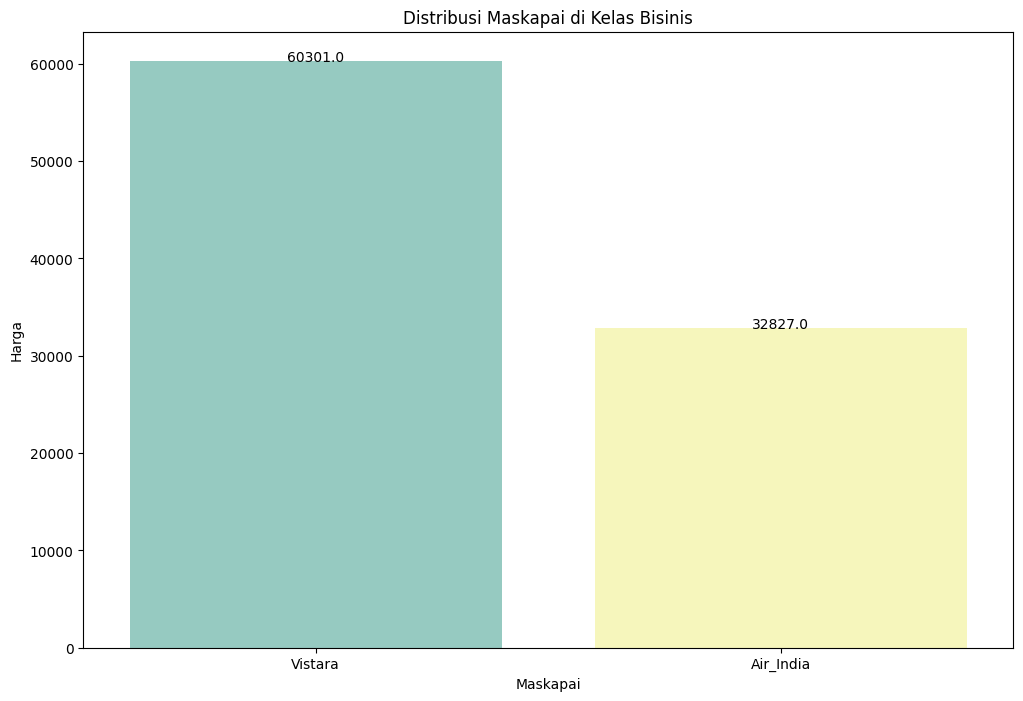

In [37]:
colors_count = bus['airline'].value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(colors_count))
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Maskapai')
plt.ylabel('Harga')
plt.title('Distribusi Maskapai di Kelas Bisinis')

plt.show()

In [38]:
bus.groupby(['airline'])['price'].mean().reset_index().sort_values(by='price', ascending=False)

,airline,price
1,Vistara,55349.249382
0,Air_India,47113.803576


Text(0.5, 1.0, 'Distribusi kota yang menggunakan kelas bisnis')

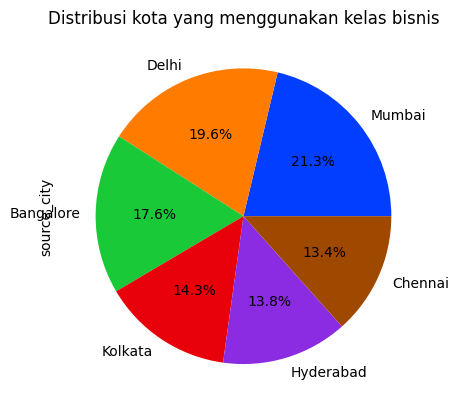

In [39]:
colors = sns.color_palette('bright')
bus['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribusi kota yang menggunakan kelas bisnis')

Apakah harga berbeda pada maskapai?

In [40]:
df = airlines.groupby(['airline'])['price'].median()
df

airline
AirAsia       3276.0
Air_India    11575.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

<ipython-input-41-9fb8b4e88ab5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm.index, y=dm, palette=colors)


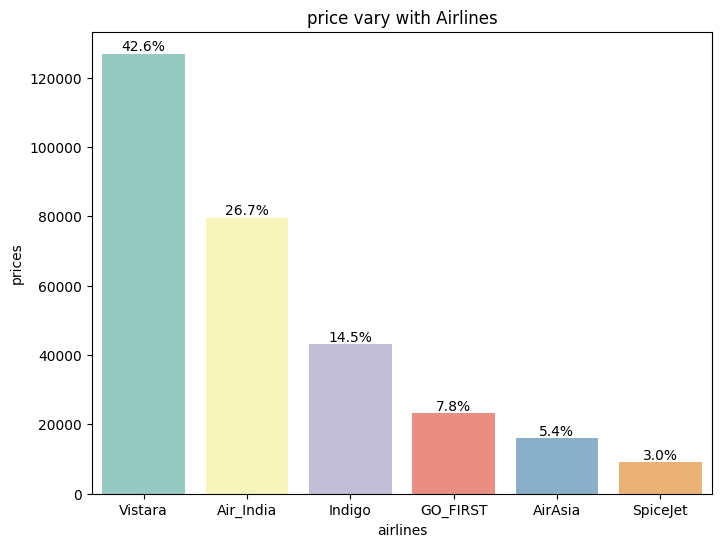

In [41]:
dm = airlines['airline'].value_counts()
total_customers = len(airlines)

percentages = dm / total_customers * 100

# Choose a different color palette from Seaborn
colors = sns.color_palette('Set3', n_colors=len(dm))

plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, palette=colors)

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('price vary with Airlines')
plt.xlabel('airlines')
plt.ylabel('prices')

plt.show()

Apakah harga tiket berbeda antara Kelas Ekonomi dengan Kelas Bisnis?

<Axes: title={'center': 'Perbedaan tiap kelas tiket'}, ylabel='price'>

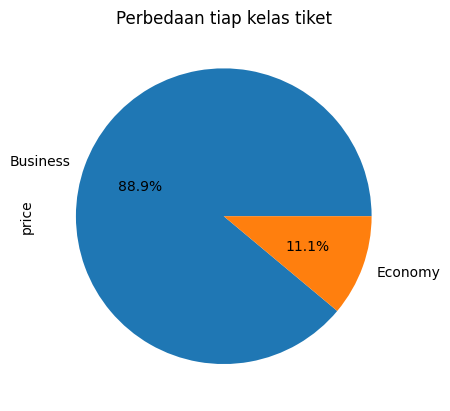

In [42]:
airlines.groupby(['class'])['price'].mean().plot(kind='pie', title='Perbedaan tiap kelas tiket', autopct='%1.1f%%')

Apakah perubahan harga tiket berdasarkan pada waktu keberangkatan dan kedatangan?

Text(0.5, 1.0, 'harga maskapai berdasarkan waktu kedatangan')

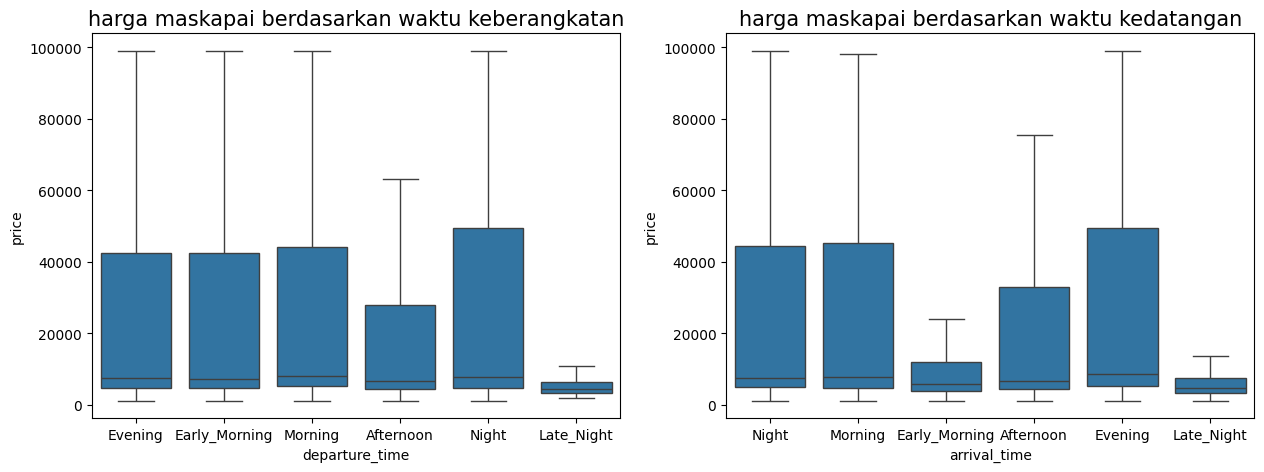

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=airlines, x='departure_time', y='price', showfliers=False).set_title('harga maskapai berdasarkan waktu keberangkatan', fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=airlines, x='arrival_time', y='price', showfliers=False).set_title('harga maskapai berdasarkan waktu kedatangan', fontsize=15)

Bagaimana perubahan harga dengan perubahan kota asal dan kota tujuan?

Text(0.5, 0.98, 'Perubahan Harga dengan Kota asal dan tujuan')

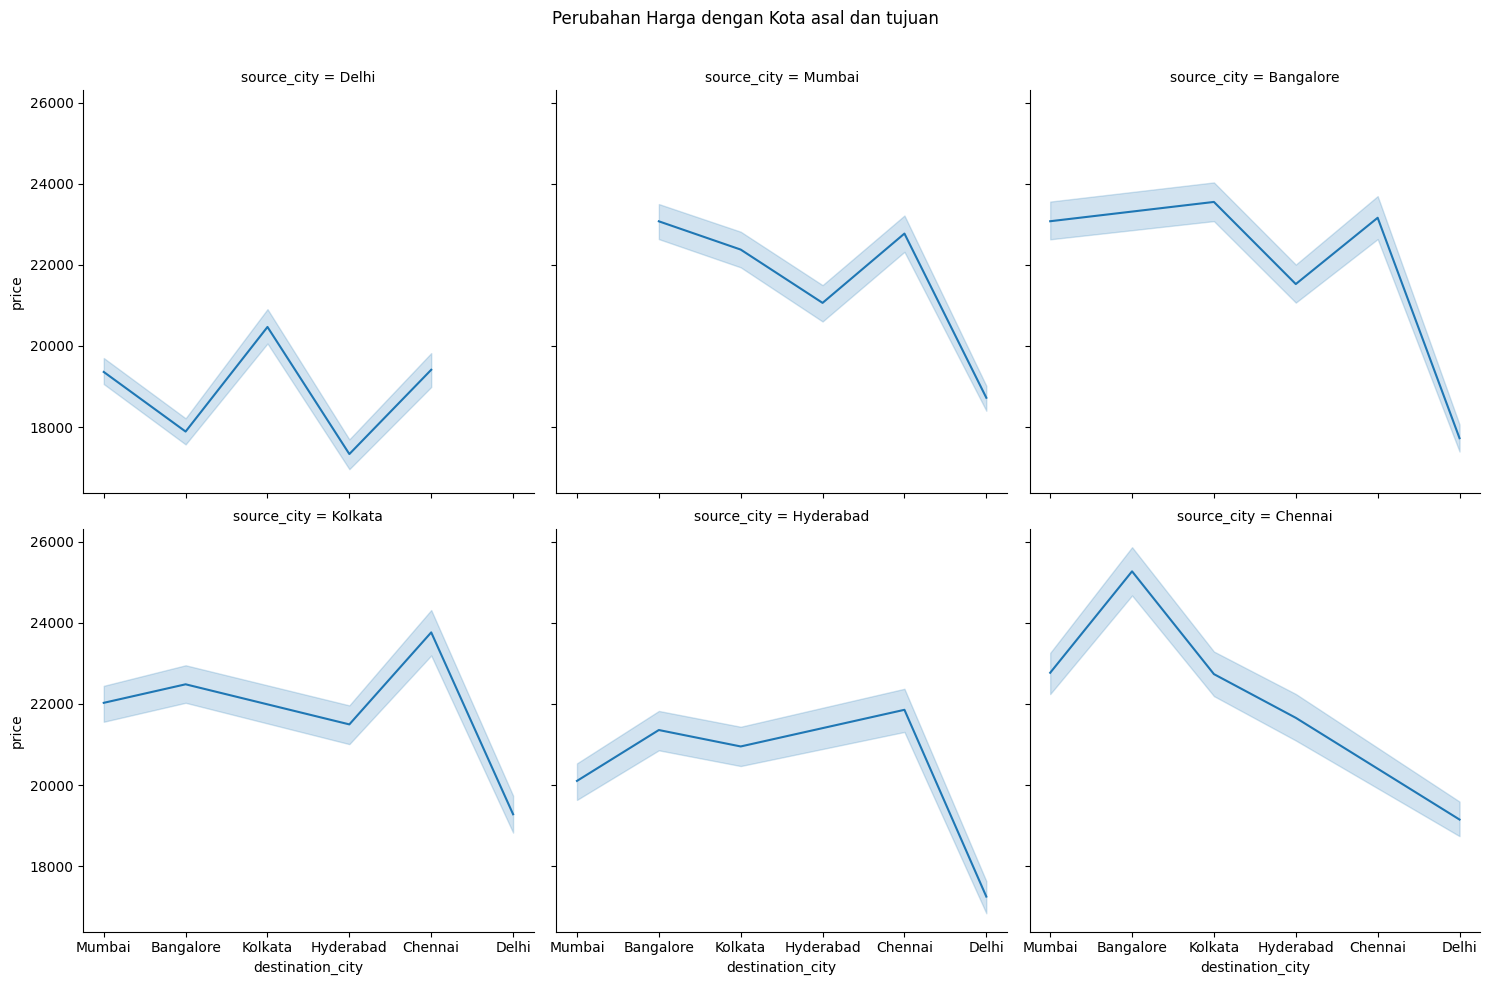

In [44]:
source_and_dest_price = sns.relplot(col='source_city', y='price', kind='line', x='destination_city', data=airlines, col_wrap=3)
source_and_dest_price.fig.subplots_adjust(top=0.9)
source_and_dest_price.fig.suptitle('Perubahan Harga dengan Kota asal dan tujuan')

> Berdasarkan grafik ini, terlihat bahwa penerbangan yang berangkat dan tiba di Delhi umumnya lebih murah, sedangkan penerbangan yang berangkat dan tiba di Bangalore harganya lebih mahal.

#### **Bagaimana perubahan harga tiket antara kelas ekonomi dengan kelas bisnis?**

Text(0.5, 1.0, 'Maskapai berdasarkan kelas bisnis')

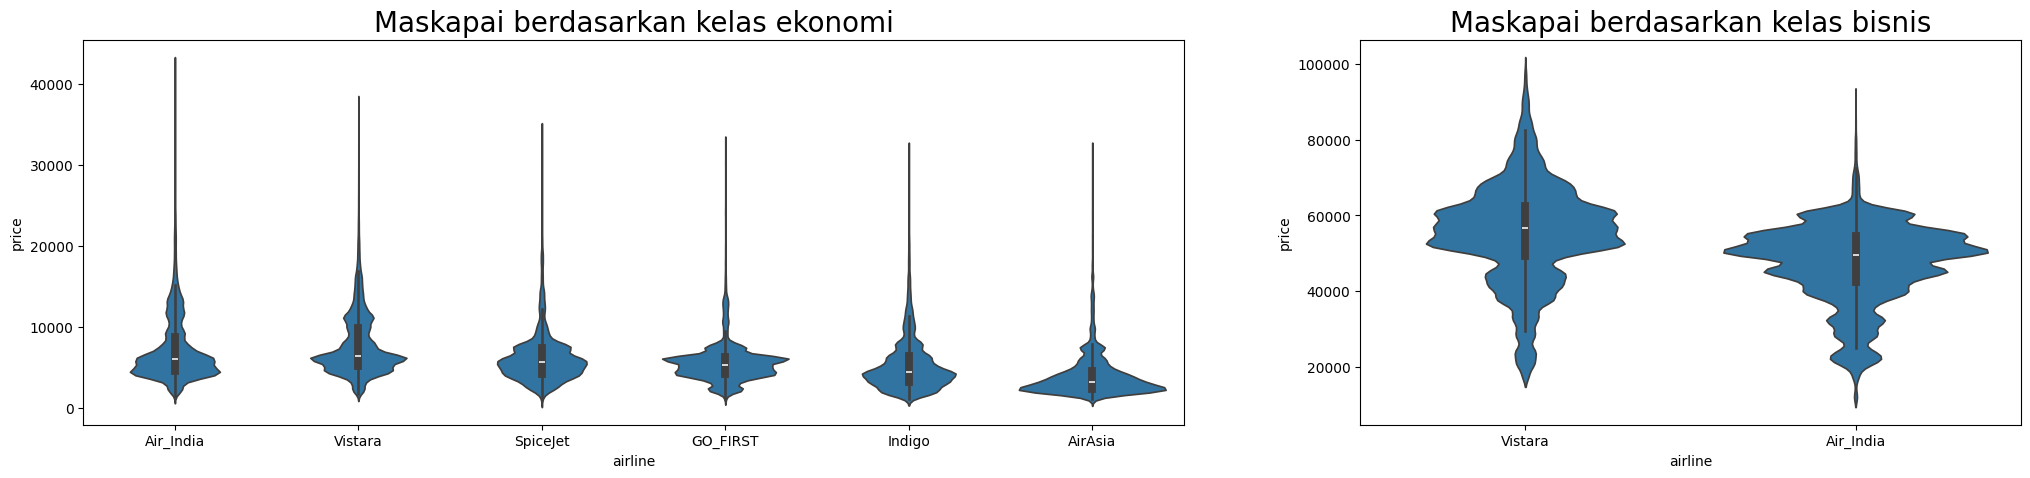

In [45]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(x='airline', y='price', data=airlines.loc[airlines['class']=='Economy'].sort_values(by='price', ascending=False), ax=axs[0])
axs[0].set_title('Maskapai berdasarkan kelas ekonomi', fontsize=20)
sns.violinplot(x='airline', y='price', data=airlines.loc[airlines['class']=='Business'].sort_values(by='price', ascending=False), ax=axs[1])
axs[1].set_title('Maskapai berdasarkan kelas bisnis', fontsize=20)

> Harga tiket pesawat bervariasi tergantung maskapainya. Di antara maskapai yang ada, Air India dan Vistara tergolong yang termahal, sedangkan AirAsia menawarkan harga yang paling bersahabat. Khusus untuk kelas bisnis, Vistara mematok harga tertinggi dibanding maskapai lain, termasuk AirAsia.

#### **Apakah harga tiket berubah berdasarkan pemberhentian penerbangan?**

<Axes: title={'center': 'Distribusi pemberhentian penerbangan'}, ylabel='stops'>

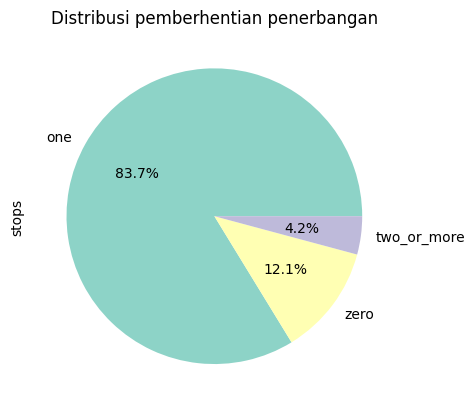

In [46]:
airlines['stops'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribusi pemberhentian penerbangan', colors=colors)

Text(0.5, 1.0, 'Distribusi harga tiket berdasarkan jumlah pemberhentian untuk setiap maskapai')

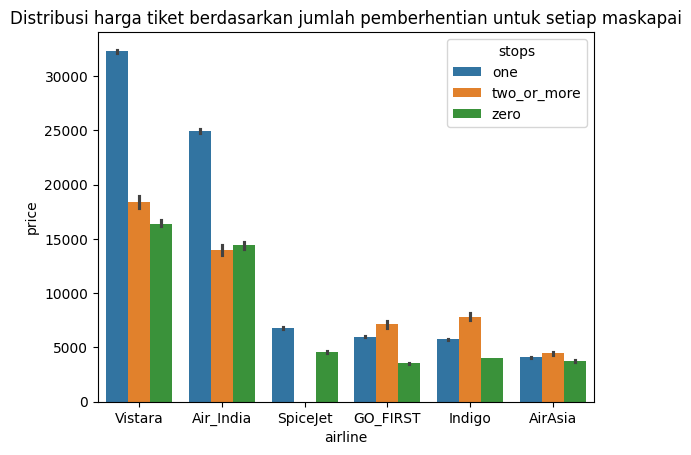

In [47]:
sns.barplot(y='price', x='airline', hue='stops', data=airlines.sort_values("price", ascending=False))
plt.title("Distribusi harga tiket berdasarkan jumlah pemberhentian untuk setiap maskapai")

> 83.6 persentase penerbangan sekali pemberhentian yang digunakan maskapai dan maskapai yang paling berhenti sekali paling banyak adalah Vistara dan Air India.

In [48]:
df = airlines.copy()

In [49]:
airlines['source_to_destination'] = airlines['source_city']+' to '+airlines['destination_city']
airlines

<ipython-input-49-6441c029df62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['source_to_destination'] = airlines['source_city']+' to '+airlines['destination_city']


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destination
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


In [50]:
airlines.groupby(['source_to_destination', 'airline'])['price'].size().reset_index().sort_values(by='price', ascending=False)

,source_to_destination,airline,price
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5811
11,Bangalore to Delhi,Vistara,5404
29,Bangalore to Mumbai,Vistara,5373
65,Delhi to Bangalore,Vistara,5366
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


Berapa mean harga dan durasi penerbangan dengan kota asal ke kota tujuan?

In [51]:
mean_harga = airlines.groupby(['source_to_destination'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
mean_harga[0:5]

,source_to_destination,price
5,Chennai to Bangalore,25265.997149
21,Kolkata to Chennai,23760.499847
3,Bangalore to Kolkata,23548.773734
0,Bangalore to Chennai,23157.951445
4,Bangalore to Mumbai,23072.776691


Jumlah pemberhentian untuk setiap perjalanan

<ipython-input-52-0d5d6328360c>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='source_to_destination', hue='stops', data=airlines, palette=colors)


<Figure size 640x480 with 0 Axes>

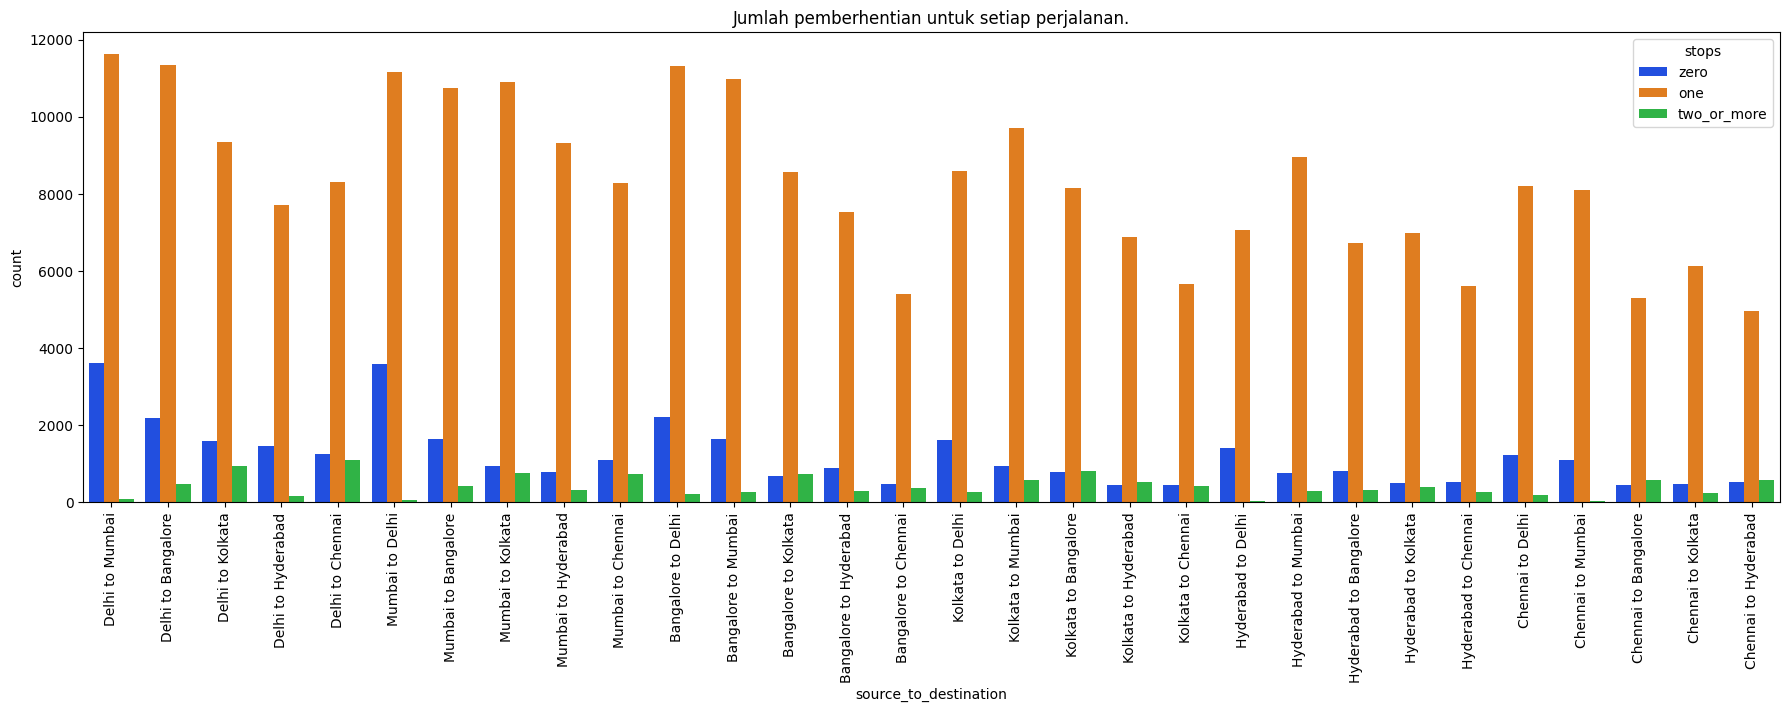

In [52]:
colors=sns.color_palette('bright')
plt.clf()
plt.figure(figsize=(18,7))
sns.countplot(x='source_to_destination', hue='stops', data=airlines, palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Jumlah pemberhentian untuk setiap perjalanan.')
plt.show()

In [53]:
days_left = airlines.groupby(['days_left'])['price'].mean()

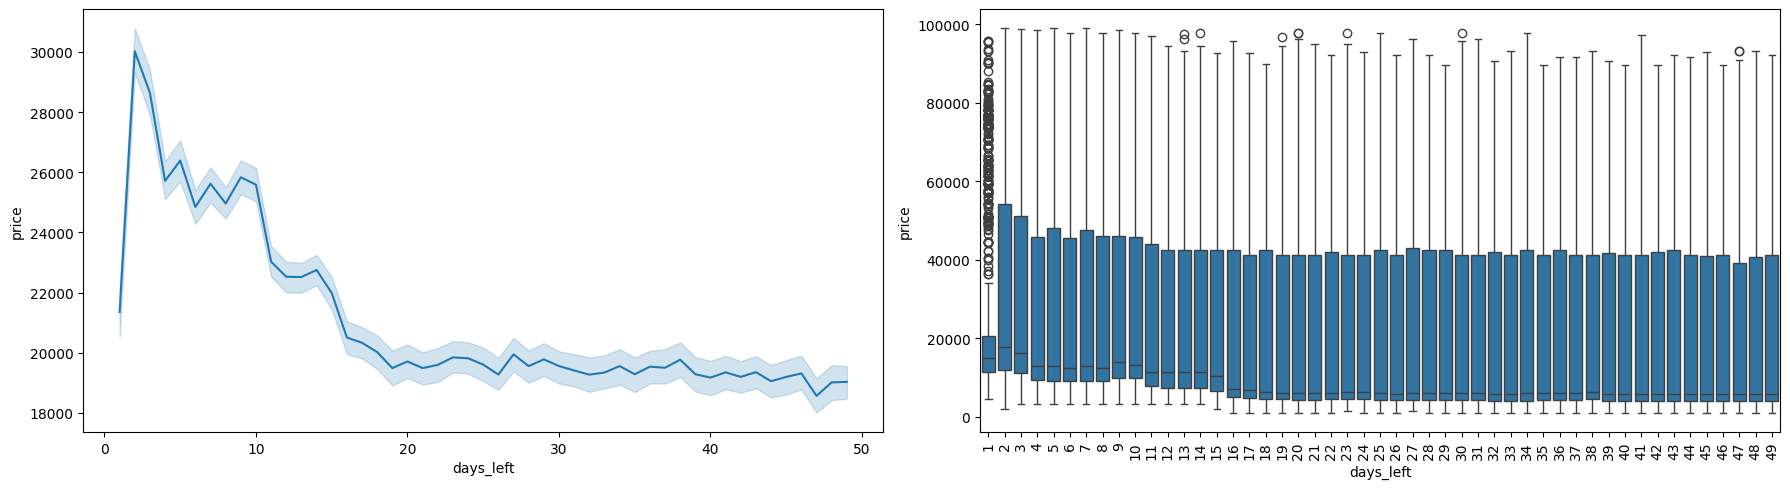

In [54]:
fig, axs = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
sns.lineplot(x='days_left',y='price', data=airlines, ax=axs[0])
sns.boxplot(x='days_left', y='price', data=airlines, ax=axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div style="background-color:rgba(250,230,7,1);">

> ⚠ Informasi: Grafik ini mengilustrasikan terdapat peningkatan harga hingga 20 hari sebelum penerbangan, diikuti dengan penurunan yang sangat tajam menjelang 1 hari, menjadi harga 3 kali lebih murah. Pola ini menyarankan, maskapai boleh mengurangi harga menjelang waktu keberangkatan untuk mengisi kursi kosong dan memastikan kursi penuh di pesawat mereka.

</div>

In [55]:
airlines['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [56]:
def offer(x):
    if x['days_left']==1:
        return ("5% offer")
    elif x['days_left']>=2 and x['days_left']<=8:
        return('7% offer')
    elif x['days_left']>8 and x['days_left']>=15:
        return('10% offer')
    else:
        return('no offer')

airlines['offer']=airlines.apply(offer,axis=1)

<ipython-input-56-143b9ac4eadb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['offer']=airlines.apply(offer,axis=1)


Text(0.5, 1.0, 'Penawaran untuk setiap tiket berdasarkan waktu booking')

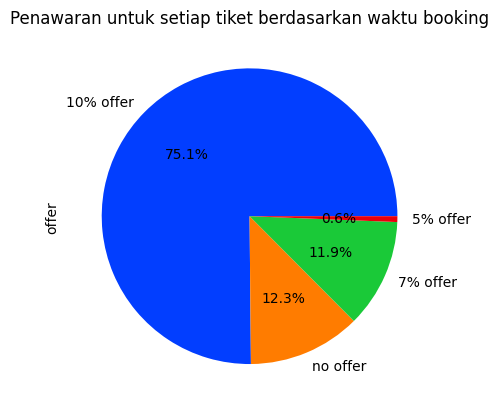

In [57]:
airlines['offer'].value_counts().plot(kind='pie',autopct = "%1.1f%%",colors = colors)
plt.title('Penawaran untuk setiap tiket berdasarkan waktu booking')

> Berdasarkan analisis, kebanyakan pesawat di hari pertama dibooking (dilihat dari 10% adalah terbanyak), dan penerbangan tidak diisi pada hari dimana terdapat pengurangan harga pesawat, sehingga perlu mengurangi harga lebih lanjut.

In [58]:
city_count = dict(airlines['source_city'].value_counts())
city_count

{'Delhi': 61156,
 'Mumbai': 60683,
 'Bangalore': 51548,
 'Kolkata': 45841,
 'Hyderabad': 40636,
 'Chennai': 38056}

In [59]:
def offer_city(count):
    if  count>=60000:
        return('offer 5%')
    if   45000 <= count < 60000:
         return('offer 7%')
    if   30000<= count <45000:
        return('offer 10%')
    else:
        return('no offer')

airlines['offer_city']=airlines['source_city'].map(city_count).apply(offer_city)

<ipython-input-59-7a38e206119f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines['offer_city']=airlines['source_city'].map(city_count).apply(offer_city)


In [60]:
airlines

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destination,offer,offer_city
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,5% offer,offer 5%
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,5% offer,offer 5%
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,5% offer,offer 5%
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,5% offer,offer 5%
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,5% offer,offer 5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,10% offer,offer 10%
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,10% offer,offer 10%
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,10% offer,offer 10%
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,10% offer,offer 10%


# Data Preparation

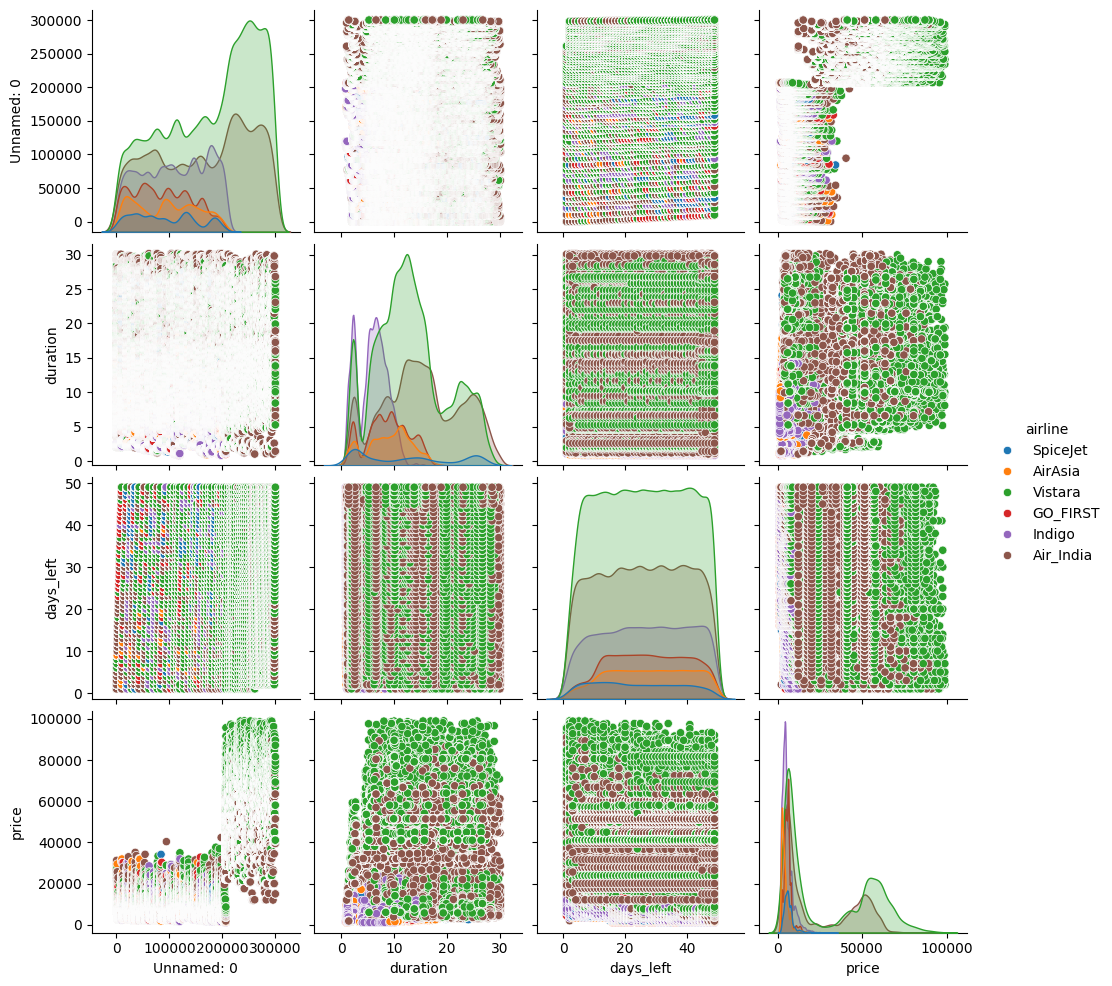

In [61]:
sns.pairplot(df, hue='airline')

In [62]:
duplicated = df.duplicated()
duplicated.sum()

0

In [63]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,297920,297920,297920,297920,297920,297920,297920,297920
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,126917,3116,61156,70372,249478,90702,58656,204792


In [64]:
df['airline'].value_counts()

Vistara      126917
Air_India     79601
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['airline'] = label_encoder.fit_transform(df['airline'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['class'] = label_encoder.fit_transform(df['class'])

In [66]:
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [67]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [68]:
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price               1.000000
airline             0.241990
duration            0.215252
departure_time      0.058732
arrival_time        0.041672
destination_city    0.005415
source_city         0.003426
days_left          -0.090813
stops              -0.203487
class              -0.938806
Name: price, dtype: float64


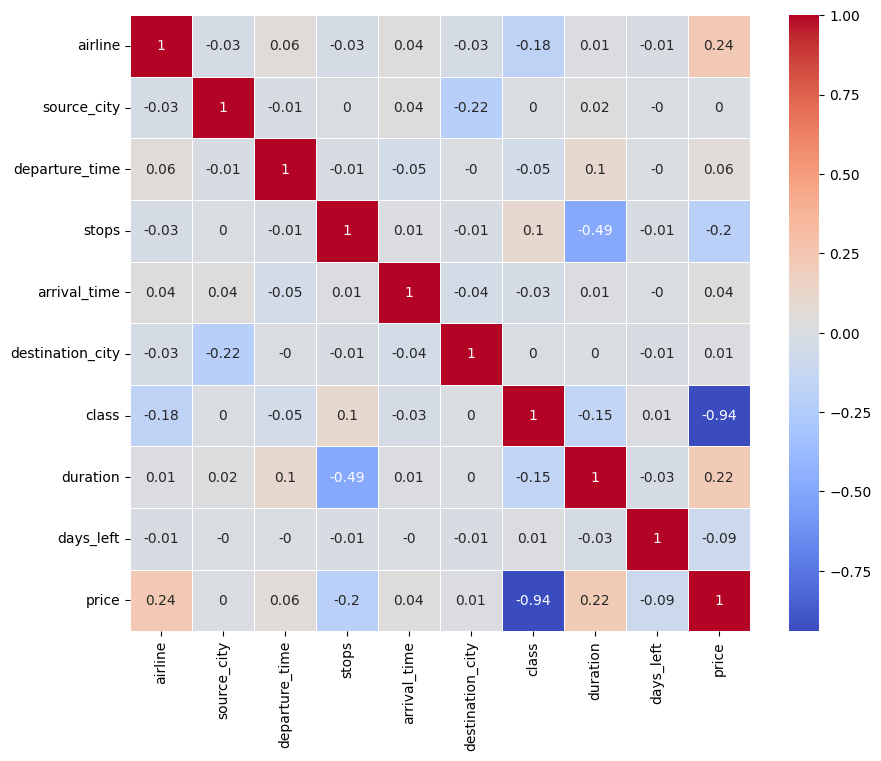

<Figure size 2000x2000 with 0 Axes>

In [69]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.figure(figsize=(20,20))
plt.show()

In [70]:
df.mean()

airline                 3.108002
source_city             2.581414
departure_time          2.421774
stops                   0.283452
arrival_time            3.075010
destination_city        2.588181
class                   0.687406
duration               12.071699
days_left              26.039370
price               20882.941276
dtype: float64

In [71]:
X = df.drop(['price'], axis=1).values
y = df.price.values

Standarization

In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaler)

In [73]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
0,0.000000,0.621600,0.366360,0.600000,1.000000
1,0.000000,0.516283,0.350251,0.400000,1.000000
2,0.000000,0.484355,0.350764,0.400000,1.000000
3,0.000000,0.141726,0.333471,0.000000,1.000000
4,0.000000,0.615002,0.348383,0.800000,1.000000
5,0.000000,0.517636,0.348858,0.600000,1.000000
6,0.000000,0.687406,0.463551,1.000000,1.000000
7,0.000000,0.383153,0.238380,0.352420,1.000000
8,0.000000,0.521654,0.282284,0.520833,1.000000


# Modeling

In [74]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [75]:
X_train.shape

(208544, 9)

In [76]:
y_train.shape

(208544,)

In [77]:
X_test.shape

(89376, 9)

In [78]:
y_test.shape

(89376,)

In [79]:
from sklearn.metrics import r2_score, \
mean_absolute_error, \
mean_squared_error, \
mean_absolute_percentage_error

In [80]:
# analisis model
models_name = ["Linear Regression",
                 "Decision Tree Regressor",
                 "Random Forest Regressor",
                 "Gradient Boosting Regressor",
                 "AdaBoostRegressor",
                 "XGBRegressor"]
eval_matrices = ['MAE', 'MSE', 'MAPR', 'R2 Squared']
models = pd.DataFrame(index=eval_matrices,
		      columns=models_name)

### Linear Regression

In [81]:
from sklearn import linear_model
LR = linear_model.LinearRegression()

LR.fit(X_train, y_train)
print("train score: {:.2f}".format(LR.score(X_train,y_train)))
print("test score: {:.2f}".format(LR.score(X_train,y_train)))
y_pred = LR.predict(X_test)
LR_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})

models.loc['Linear Regression', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Linear Regression', 'R2']))
models.loc['Linear Regression', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Linear Regression', 'MAE']))
models.loc['Linear Regression', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Linear Regression', 'MSE']))
models.loc['Linear Regression', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['Linear Regression', 'MAPR']))

train score: 0.91
test score: 0.91
r2 score: 0.91
MAE: 4633.65
MSE: 48327818.91
MAPR: 0.44


In [82]:
LR.intercept_

50637.544390435

In [83]:
LR.coef_

array([  4681.28282749,    498.53994175,    252.50018158,  -6750.84077086,
          956.7211512 ,    590.28581342, -44521.20838939,   2283.08083843,
        -6231.62800754])

### Decision Tree

In [84]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

Rtree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=9, random_state=42)

Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)
Rtree_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(Rtree.score(X_train,y_train)))
print("test score: {:.2f}".format(Rtree.score(X_train,y_train)))

models.loc['Decision Tree Regressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Decision Tree Regressor', 'R2']))
models.loc['Decision Tree Regressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Decision Tree Regressor', 'MAE']))
models.loc['Decision Tree Regressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Decision Tree Regressor', 'MSE']))
models.loc['Decision Tree Regressor', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['Decision Tree Regressor', 'MAPR']))

train score: 0.96
test score: 0.96
r2 score: 0.96
MAE: 2533.20
MSE: 20060289.41
MAPR: 0.17


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=9)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rforest_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(rf_model.score(X_train,y_train)))
print("test score: {:.2f}".format(rf_model.score(X_train,y_train)))

models.loc['Random Forest Regressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Random Forest Regressor', 'R2']))
models.loc['Random Forest Regressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Random Forest Regressor', 'MAE']))
models.loc['Random Forest Regressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Random Forest Regressor', 'MSE']))
models.loc['Random Forest Regressor', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['Random Forest Regressor', 'MAPR']))

train score: 0.96
test score: 0.96
r2 score: 0.96
MAE: 2456.00
MSE: 19027649.10
MAPR: 0.17


### Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
gb_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(gb_model.score(X_train,y_train)))
print("test score: {:.2f}".format(gb_model.score(X_train,y_train)))

models.loc['Gradient Boosting Regressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['Gradient Boosting Regressor', 'R2']))
models.loc['Gradient Boosting Regressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['Gradient Boosting Regressor', 'MAE']))
models.loc['Gradient Boosting Regressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['Gradient Boosting Regressor', 'MSE']))
models.loc['Gradient Boosting Regressor', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['Gradient Boosting Regressor', 'MAPR']))

train score: 0.95
test score: 0.95
r2 score: 0.95
MAE: 2963.10
MSE: 24177320.33
MAPR: 0.21


### Ada Boost

In [93]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
ada_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(ada_model.score(X_train,y_train)))
print("test score: {:.2f}".format(ada_model.score(X_train,y_train)))

models.loc['AdaBoostRegressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['AdaBoostRegressor', 'R2']))
models.loc['AdaBoostRegressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['AdaBoostRegressor', 'MAE']))
models.loc['AdaBoostRegressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['AdaBoostRegressor', 'MSE']))
models.loc['AdaBoostRegressor', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['AdaBoostRegressor', 'MAPR']))

train score: 0.94
test score: 0.94
r2 score: 0.94
MAE: 3634.49
MSE: 33299410.00
MAPR: 0.31


### XG Boost

In [96]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_pred = pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
print("train score: {:.2f}".format(xgb.score(X_train,y_train)))
print("test score: {:.2f}".format(xgb.score(X_train,y_train)))

models.loc['XGBRegressor', 'R2'] = r2_score(y_test, y_pred)
print("r2 score: {:.2f}".format(models.loc['XGBRegressor', 'R2']))
models.loc['XGBRegressor', 'MAE'] = mean_absolute_error(y_test,y_pred)
print("MAE: {:.2f}".format(models.loc['XGBRegressor', 'MAE']))
models.loc['XGBRegressor', 'MSE'] = mean_squared_error(y_test,y_pred)
print("MSE: {:.2f}".format(models.loc['XGBRegressor', 'MSE']))
models.loc['XGBRegressor', 'MAPR'] = mean_absolute_percentage_error(y_test,y_pred)
print("MAPR: {:.2f}".format(models.loc['XGBRegressor', 'MAPR']))

train score: 0.98
test score: 0.98
r2 score: 0.98
MAE: 2041.25
MSE: 12286355.69
MAPR: 0.15


# Evaluation

In [99]:
eval = pd.DataFrame(columns=eval_matrices,
                    index = models_name)

eval.index.name = 'Model'

model_dict = {models_name[0] : LR,
              models_name[1] : Rtree,
              models_name[2] : rf_model,
              models_name[3] : gb_model,
              models_name[4] : ada_model,
              models_name[5] : xgb}

for name, model in model_dict.items():
    eval.loc[name, eval_matrices[3]] = r2_score(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[0]] = mean_absolute_error(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[1]] = mean_squared_error(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[2]] = mean_absolute_percentage_error(y_test, model.predict(X_test))

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == eval['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['MAPR'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

styled_eval = eval.style.applymap(highlight_min_max)
styled_eval

,MAE,MSE,MAPR,R2 Squared
Model,,,,
Linear Regression,4633.650915,48327818.910125,0.440163,0.906003
Decision Tree Regressor,2533.197495,20060289.411820,0.170477,0.960983
Random Forest Regressor,2455.996385,19027649.101410,0.165990,0.962991
Gradient Boosting Regressor,2963.104288,24177320.326169,0.211184,0.952975
AdaBoostRegressor,3634.494093,33299409.997537,0.305623,0.935233
XGBRegressor,2041.247456,12286355.686425,0.150527,0.976103


In [100]:
train_eval = pd.DataFrame(columns=eval_matrices,
                    index = models_name)

train_eval.index.name = 'Model'

model_dict = {models_name[0] : LR,
              models_name[1] : Rtree,
              models_name[2] : rf_model,
              models_name[3] : gb_model,
              models_name[4] : ada_model,
              models_name[5] : xgb}

for name, model in model_dict.items():
    train_eval.loc[name, eval_matrices[3]] = r2_score(y_train, model.predict(X_train))
    train_eval.loc[name, eval_matrices[0]] = mean_absolute_error(y_train, model.predict(X_train))
    train_eval.loc[name, eval_matrices[1]] = mean_squared_error(y_train, model.predict(X_train))
    train_eval.loc[name, eval_matrices[2]] = mean_absolute_percentage_error(y_train, model.predict(X_train))

train_eval

,MAE,MSE,MAPR,R2 Squared
Model,,,,
Linear Regression,4624.663526,48270434.566909,0.438737,0.906084
Decision Tree Regressor,2476.431182,19351661.188919,0.167844,0.962349
Random Forest Regressor,2399.472281,18338301.928985,0.163426,0.96432
Gradient Boosting Regressor,2952.458659,24107343.37692,0.210782,0.953096
AdaBoostRegressor,3623.962983,33172558.051356,0.305116,0.935459
XGBRegressor,1964.908894,11438805.278302,0.146526,0.977744


## Visualisasi Metrik Evaluasi

In [110]:
# MAE Visualization
mae = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

mae['train'] = train_eval['MAE']
mae['test'] = eval['MAE']

# MSE Visualization
mse = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

mse['train'] = train_eval['MSE']
mse['test'] = eval['MSE']

# MAPR Visualization
mapr = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

mapr['train'] = train_eval['MAPR']
mapr['test'] = eval['MAPR']

# R Squared Visualization
r2 = pd.DataFrame(columns=['train', 'test'],
                    index = models_name)

r2['train'] = train_eval['R2 Squared']
r2['test'] = eval['R2 Squared']

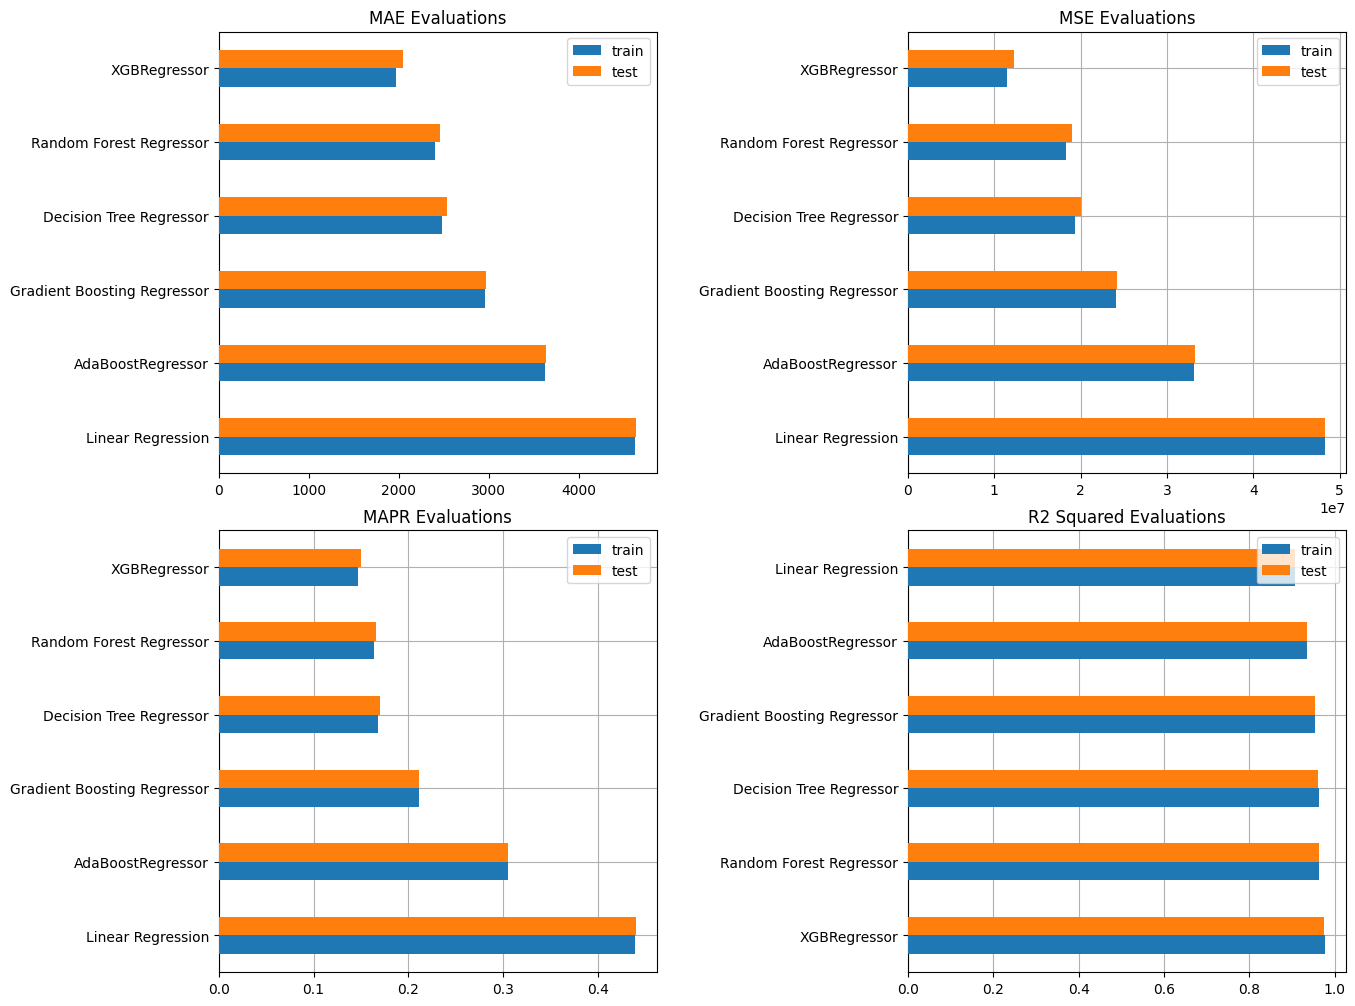

In [140]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

fig.tight_layout(h_pad=2, w_pad=15)
ax[0,0].grid(zorder=0)
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[0,0], zorder=3)
ax[0,0].set_title('MAE Evaluations')

mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[0,1], zorder=3)
ax[0,1].grid(zorder=0)
ax[0,1].set_title('MSE Evaluations')

mapr.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[1,0], zorder=3)
ax[1,0].grid(zorder=0)
ax[1,0].set_title('MAPR Evaluations')

r2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax[1,1], zorder=3)
ax[1,1].grid(zorder=0)
ax[1,1].set_title('R2 Squared Evaluations')

plt.show()

## Prediction Testing

In [105]:
prediksi = X_test.iloc[0:50].copy()
pred_dict = {'y_true':y_test[0:50]}
for name, model in model_dict.items():
    pred_dict[name] = model.predict(prediksi).round(2)

pred_df = pd.DataFrame(pred_dict)

In [106]:
pred_df.head()

,y_true,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,AdaBoostRegressor,XGBRegressor
0,7426,5943.08,5295.59,5251.80,4906.64,5559.15,5356.700195
1,4179,5348.50,5295.59,5251.80,5063.07,5559.15,5105.120117
2,6542,2259.42,5295.59,5329.85,4757.33,5559.15,5294.399902
3,9105,9936.22,11302.31,11347.07,9946.43,10731.90,10736.360352
4,8011,5396.36,5295.59,5329.85,4696.73,5559.15,6237.490234


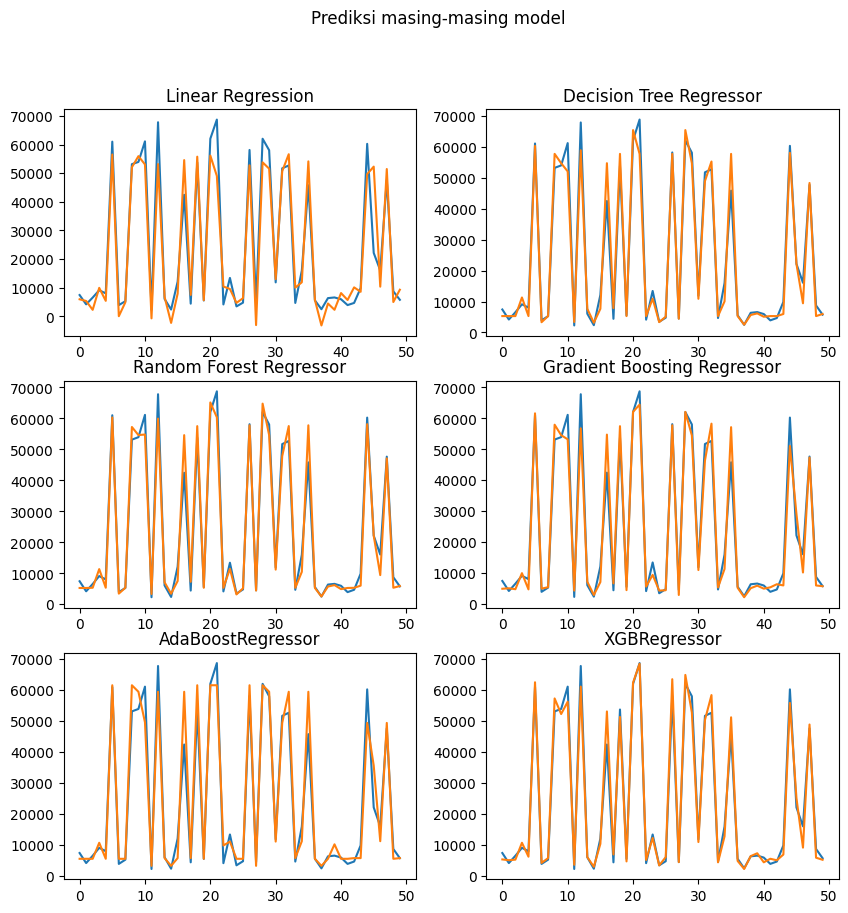

In [107]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
fig.suptitle('Prediksi masing-masing model')
axs[0,0].set_title('Linear Regression')
axs[0,0].plot(pred_df[['y_true','Linear Regression']])
axs[0,1].set_title('Decision Tree Regressor')
axs[0,1].plot(pred_df[['y_true','Decision Tree Regressor']])
axs[1,0].set_title('Random Forest Regressor')
axs[1,0].plot(pred_df[['y_true','Random Forest Regressor']])
axs[1,1].set_title('Gradient Boosting Regressor')
axs[1,1].plot(pred_df[['y_true','Gradient Boosting Regressor']])
axs[2,0].set_title('AdaBoostRegressor')
axs[2,0].plot(pred_df[['y_true','AdaBoostRegressor']])
axs[2,1].set_title('XGBRegressor')
axs[2,1].plot(pred_df[['y_true','XGBRegressor']])
plt.show()